In [1]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.3,rotation_range=60)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('train',target_size=(150,150),batch_size=16 ,class_mode='binary')
test_set = test_datagen.flow_from_directory('test',target_size=(150,150),class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [3]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

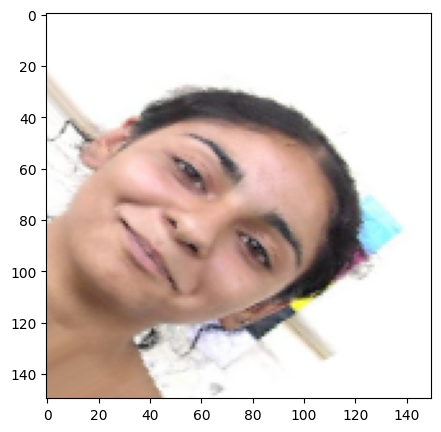

In [5]:
training_set[0][0].shape
plt.figure(figsize=(5,5))
plt.imshow(training_set[0][0][0])

In [6]:
model.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
83/83 [==============================] - 31s 356ms/step - loss: 0.6302 - accuracy: 0.6065 - val_loss: 0.2495 - val_accuracy: 0.8918
Epoch 2/10
83/83 [==============================] - 31s 365ms/step - loss: 0.3494 - accuracy: 0.8744 - val_loss: 0.1753 - val_accuracy: 0.9742
Epoch 3/10
83/83 [==============================] - 29s 349ms/step - loss: 0.2993 - accuracy: 0.8767 - val_loss: 0.1247 - val_accuracy: 0.9536
Epoch 4/10
83/83 [==============================] - 29s 344ms/step - loss: 0.2319 - accuracy: 0.9125 - val_loss: 0.0706 - val_accuracy: 0.9897
Epoch 5/10
83/83 [==============================] - 31s 371ms/step - loss: 0.1699 - accuracy: 0.9300 - val_loss: 0.0995 - val_accuracy: 0.9588
Epoch 6/10
83/83 [==============================] - 30s 365ms/step - loss: 0.2084 - accuracy: 0.9262 - val_loss: 0.1169 - val_accuracy: 0.9485
Epoch 7/10
83/83 [==============================] - 29s 347ms/step - loss: 0.1839 - accuracy: 0.9292 - val_loss: 0.0670 - val_accuracy: 0.9897

model.save('final_model.h5')